# Ambient Tracer Concentrations from SalishSeaCast Climatology
Trying to make a good approximation of ambient concentrations of the tracers in the Salish Sea - this will make looking at whatever the input from the Pacific is easier to discern. <br>
Average over all years (as annual and monthly)

In [10]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


# for mapping
from cmocean import cm
import warnings

warnings.simplefilter('ignore')

In [25]:
path = Path("/results/SalishSea/month-avg.201905/")
tracers =xr.open_mfdataset(sorted(path.glob(f"SalishSea_1m_201*_ptrc_T.nc"))) 
#lets say the 2010s are fine FOR NOW, 2009 is the year with a funky thing in it, wirte this later st it only skips 2009

# tracers = xr.open_mfdataset("/results/SalishSea/month-avg.201905/SalishSea_1m_*_ptrc_T.nc")

In [32]:
tracers = tracers.mean(dim= 'time_counter')

In [33]:
tracers

<xarray.Dataset>
Dimensions:                       (y: 898, x: 398, nvertex: 4, deptht: 40, axis_nbounds: 2)
Coordinates:
    nav_lat                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/15)
    bounds_lon                    (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    bounds_lat                    (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    area                          (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    deptht_bounds                 (deptht, axis_nbounds) float32 dask.array<chunksize=(40, 2), meta=np.ndarray>
    nitrate                       (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    ammonium                      (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    ...                            ...
    ciliates                      (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    microzooplankton              (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>
    mesozooplankton               (deptht, y, x) float32 dask.array<chunksize=(40, 898, 398), meta=np.ndarray>

#### first lets jsut look at how much silicon and nitrate change in space ofver the domain to get a good idea about how we want to average it

In [34]:
# Load grid
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

Text(0.5, 1.0, 'deep')

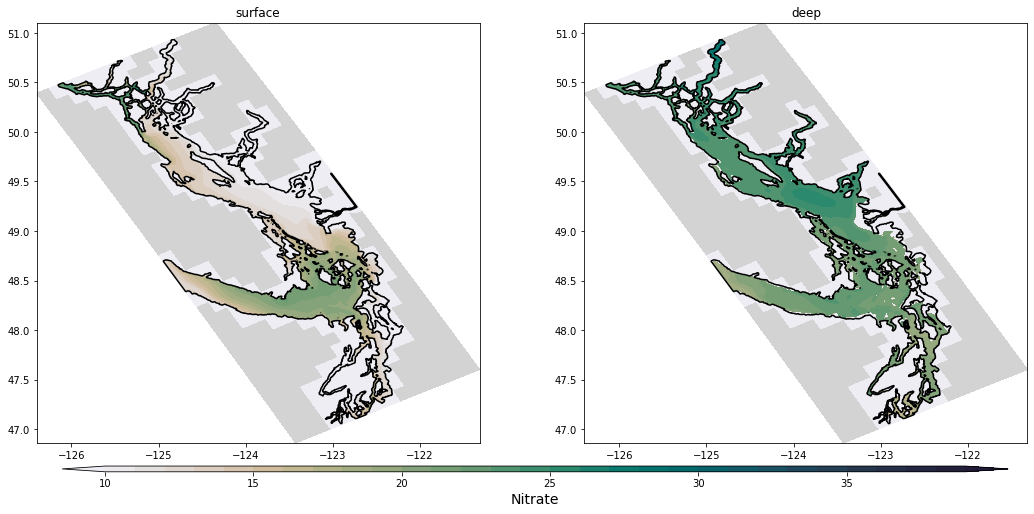

In [41]:
fig, ax = plt.subplots(1,2, figsize=(18, 8))
#surface
C = ax[0].contourf(grid.nav_lon, grid.nav_lat, tracers['nitrate'].isel(deptht=0), range(10, 40), cmap=cm.rain, extend='both', zorder=2)
ax[0].contourf(grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax[0].contour(grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax[0].set_aspect(5/4.4)
ax[0].set_title('surface')

#deep
C = ax[1].contourf(grid.nav_lon, grid.nav_lat, tracers['nitrate'].isel(deptht=20), range(10, 40), cmap=cm.rain, extend='both', zorder=2)
ax[1].contourf(grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax[1].contour(grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax[1].set_aspect(5/4.4)
ax[1].set_title('deep')

# Colorbar
fig.subplots_adjust(bottom=0.15)
cax = fig.add_axes([0.15, 0.1, 0.73, 0.01])
cbar = fig.colorbar(C, cax=cax, orientation='horizontal', label='Nitrate')
cbar.set_label(label='Nitrate', size=14)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), size=14)
cbar.set_ticks(range(10, 40, 5))

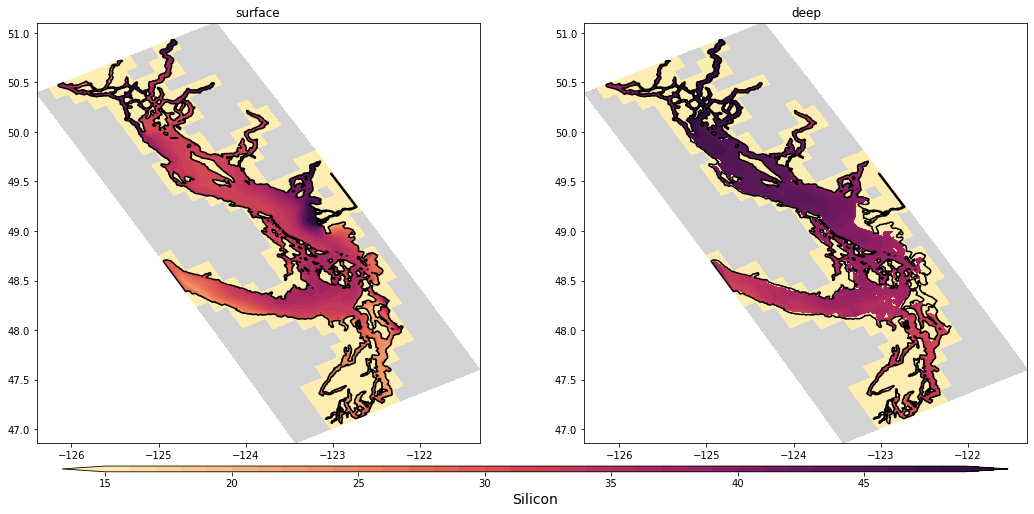

In [43]:
fig, ax = plt.subplots(1,2, figsize=(18, 8))
#surface
C = ax[0].contourf(grid.nav_lon, grid.nav_lat, tracers['silicon'].isel(deptht=0), range(15, 50), cmap=cm.matter, extend='both', zorder=2)
ax[0].contourf(grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax[0].contour(grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax[0].set_aspect(5/4.4)
ax[0].set_title('surface')

#deep
C = ax[1].contourf(grid.nav_lon, grid.nav_lat, tracers['silicon'].isel(deptht=20), range(15, 50), cmap=cm.matter, extend='both', zorder=2)
ax[1].contourf(grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax[1].contour(grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax[1].set_aspect(5/4.4)
ax[1].set_title('deep')

# Colorbar
fig.subplots_adjust(bottom=0.15)
cax = fig.add_axes([0.15, 0.1, 0.73, 0.01])
cbar = fig.colorbar(C, cax=cax, orientation='horizontal', label='Silicon')
cbar.set_label(label='Silicon', size=14)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), size=14)
cbar.set_ticks(range(15, 50, 5))